In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st


df = pd.read_csv("C:/Users/vuli/Documents/Elearning-Analysis/elearning-analysis/udemy_courses.csv")

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
import pandas as pd

print("📦 Dataset shape:", df.shape)
print("🧾 Column list:", df.columns.tolist())

# Đếm số lượng giá trị thiếu trên mỗi cột
missing = df.isnull().sum().sort_values(ascending=False)

# Tính tỷ lệ %
missing_percent = (df.isnull().mean() * 100).sort_values(ascending=False)

# Gộp kết quả thành bảng
missing_table = pd.DataFrame({
    "Missing Values": missing,
    "Missing (%)": missing_percent.round(2)
})

print("\n🔎 Missing Value Summary:")
print(missing_table[missing_table["Missing Values"] > 0])
# Đếm số dòng trùng lặp hoàn toàn
duplicates_count = df.duplicated().sum()
print(f"\n🔁 Number of duplicate rows: {duplicates_count}")

# Xem chi tiết các dòng trùng
if duplicates_count > 0:
    print("\n🧬 Example duplicated rows:")
    print(df[df.duplicated()].head())


# Thay thế giá cuối cùng (nếu có discount thì lấy discount, ngược lại lấy giá gốc)
df["final_price"] = np.where(
    df["discount_price__amount"].notna(),
    df["discount_price__amount"],
    df["price_detail__amount"]
)

# Nếu vẫn thiếu (ví dụ khóa học miễn phí) -> gán 0
df["final_price"] = df["final_price"].fillna(0)
import pandas as pd
import numpy as np

# Đọc lại dữ liệu
df = pd.read_csv("udemy_courses.csv")

# Chuẩn hóa cột
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Tổng quan
print("Dataset shape:", df.shape)

# --- 1️⃣ Kiểm tra giá trị âm hoặc không hợp lý ---
invalid_numeric = {
    "negative_prices": df[df["price_detail__amount"] < 0],
    "negative_discount_prices": df[df["discount_price__amount"] < 0],
    "negative_subscribers": df[df["num_subscribers"] < 0],
    "negative_reviews": df[df["num_reviews"] < 0],
}

for key, val in invalid_numeric.items():
    print(f"\n🔍 {key}: {len(val)} rows")

# --- 2️⃣ Kiểm tra rating vượt ngưỡng ---
invalid_ratings = df[(df["avg_rating"] > 5) | (df["avg_rating"] < 0)]
print(f"\n⭐ Invalid ratings (outside 0–5): {len(invalid_ratings)}")

# --- 3️⃣ Kiểm tra logic: review > subscriber ---
invalid_logic = df[df["num_reviews"] > df["num_subscribers"]]
print(f"⚠️ Invalid logic (reviews > subscribers): {len(invalid_logic)}")

# --- 4️⃣ Kiểm tra thời gian ---
df["created"] = pd.to_datetime(df["created"], errors="coerce")
df["published_time"] = pd.to_datetime(df["published_time"], errors="coerce")

invalid_dates = df[df["published_time"] < df["created"]]
print(f"🕐 Invalid timestamps (published before created): {len(invalid_dates)}")

# --- 5️⃣ Kiểm tra currency ---
valid_currencies = {"USD", "EUR", "GBP", "INR", "Unknown"}
invalid_currency = df[
    (~df["price_detail__currency"].isin(valid_currencies))
    & (df["price_detail__currency"].notna())
    ]
print(f"💱 Invalid currency codes: {len(invalid_currency)}")

# --- 6️⃣ Phát hiện outliers (ví dụ top 1% subscribers hoặc price) ---
subscribers_threshold = df["num_subscribers"].quantile(0.99)
price_threshold = df["price_detail__amount"].quantile(0.99)

outliers = df[
    (df["num_subscribers"] > subscribers_threshold)
    | (df["price_detail__amount"] > price_threshold)
    ]
print(f"📈 Potential outliers (top 1% values): {len(outliers)}")

# --- Tổng hợp ---
invalid_summary = {
    "negative_or_invalid_values": sum(len(v) for v in invalid_numeric.values()),
    "invalid_ratings": len(invalid_ratings),
    "logic_errors": len(invalid_logic),
    "timestamp_errors": len(invalid_dates),
    "currency_errors": len(invalid_currency),
    "outliers": len(outliers)
}

print("\n=== 🚦 Invalid Entry Summary ===")
for k, v in invalid_summary.items():
    print(f"{k}: {v}")



📦 Dataset shape: (13608, 20)
🧾 Column list: ['id', 'title', 'url', 'is_paid', 'num_subscribers', 'avg_rating', 'avg_rating_recent', 'rating', 'num_reviews', 'is_wishlisted', 'num_published_lectures', 'num_published_practice_tests', 'created', 'published_time', 'discount_price__amount', 'discount_price__currency', 'discount_price__price_string', 'price_detail__amount', 'price_detail__currency', 'price_detail__price_string']

🔎 Missing Value Summary:
                              Missing Values  Missing (%)
discount_price__price_string            1403        10.31
discount_price__currency                1403        10.31
discount_price__amount                  1403        10.31
price_detail__amount                     497         3.65
price_detail__price_string               497         3.65
price_detail__currency                   497         3.65

🔁 Number of duplicate rows: 0
Dataset shape: (13608, 20)

🔍 negative_prices: 0 rows

🔍 negative_discount_prices: 0 rows

🔍 negative_subscrib

In [23]:
# Convert timestamps
df["created"] = pd.to_datetime(df["created"], errors="coerce")
df["published_time"] = pd.to_datetime(df["published_time"], errors="coerce")

# === 1️⃣ Handle Missing Values (price columns) ===
# Tạo cột 'final_price': nếu có discount thì lấy discount, ngược lại lấy giá gốc
df["final_price"] = np.where(
    df["discount_price__amount"].notna(),
    df["discount_price__amount"],
    df["price_detail__amount"]
)

# Điền giá trị còn thiếu (0 nếu miễn phí)
df["final_price"] = df["final_price"].fillna(0)

# Kiểm tra lại missing
print("✅ Missing after fill:\n", df.isnull().sum()[df.isnull().sum() > 0])

# === 2️⃣ Fix Logic Error: num_reviews > num_subscribers ===
mask_invalid_logic = df["num_reviews"] > df["num_subscribers"]
print(f"⚙️ Fixing logic errors: {mask_invalid_logic.sum()} rows")
df.loc[mask_invalid_logic, "num_reviews"] = df.loc[mask_invalid_logic, "num_subscribers"]

# === 3️⃣ Fix Invalid Timestamp: published_time < created ===
mask_invalid_time = df["published_time"] < df["created"]
print(f"🕒 Removing invalid timestamp rows: {mask_invalid_time.sum()} rows")
df = df[~mask_invalid_time]

# === 4️⃣ Normalize Currency Fields ===
for c in ["discount_price__currency", "price_detail__currency"]:
    if c in df.columns:
        df[c] = df[c].fillna("Unknown").str.upper()

# === 5️⃣ Clip Negative Values (just in case) ===
for c in ["num_subscribers", "num_reviews", "final_price"]:
    df[c] = df[c].clip(lower=0)

# === 6️⃣ Optional: Remove extreme outliers if needed (optional keep them)
q_price = df["final_price"].quantile(0.999)
q_sub = df["num_subscribers"].quantile(0.999)
df["is_outlier"] = (df["final_price"] > q_price) | (df["num_subscribers"] > q_sub)

print(f"📈 Outliers marked: {df['is_outlier'].sum()} rows")

# === 7️⃣ Final sanity check ===
print("\n📊 Cleaned dataset summary:")
print(df[["num_subscribers", "num_reviews", "avg_rating", "final_price"]].describe().round(2))

print("\n✅ Final shape:", df.shape)

# === 8️⃣ Export cleaned dataset ===
df.to_csv("udemy_courses_cleaned.csv", index=False)
print("\n💾 Saved cleaned dataset -> udemy_courses_cleaned.csv")

✅ Missing after fill:
 discount_price__amount          1403
discount_price__currency        1403
discount_price__price_string    1403
price_detail__amount             497
price_detail__currency           497
price_detail__price_string       497
dtype: int64
⚙️ Fixing logic errors: 5 rows
🕒 Removing invalid timestamp rows: 1 rows
📈 Outliers marked: 14 rows

📊 Cleaned dataset summary:
       num_subscribers  num_reviews  avg_rating  final_price
count         13607.00     13607.00    13607.00     13607.00
mean           2847.05       243.14        3.92       779.81
std            9438.21      1581.02        1.03      1568.03
min               0.00         0.00        0.00         0.00
25%              62.00         7.00        3.80       455.00
50%             533.00        24.00        4.19       455.00
75%            2280.00        87.00        4.45       455.00
max          374836.00     78006.00        5.00     12800.00

✅ Final shape: (13607, 22)

💾 Saved cleaned dataset -> udemy_cou

In [25]:
import pandas as pd

# Đọc dataset đã làm sạch
df = pd.read_csv("udemy_courses_cleaned.csv")

# Tạo bảng đơn giản theo yêu cầu Fraunhofer
fraunhofer_df = pd.DataFrame({
    "course_id": df["id"],
    "course_name": df["title"],
    "participants": df["num_subscribers"],
    "num_reviews": df["num_reviews"],
    "price": df["final_price"],
    "revenue": df["num_subscribers"] * df["final_price"],
    "satisfaction": df["avg_rating"]
})

# Làm gọn kiểu dữ liệu
fraunhofer_df = fraunhofer_df.round({
    "price": 2,
    "revenue": 2,
    "satisfaction": 2
})

# Xuất ra file CSV đơn giản
fraunhofer_df.to_csv("fraunhofer_dashboard_data.csv", index=False)

# Xem trước 5 dòng
print(fraunhofer_df.head())


   course_id                                        course_name  participants  \
0     762616  The Complete SQL Bootcamp 2020: Go from Zero t...        295509   
1     937678  Tableau 2020 A-Z: Hands-On Tableau Training fo...        209070   
2    1361790             PMP Exam Prep Seminar -  PMBOK Guide 6        155282   
3     648826         The Complete Financial Analyst Course 2020        245860   
4     637930  An Entire MBA in 1 Course:Award Winning Busine...        374836   

   num_reviews  price      revenue  satisfaction  
0        78006  455.0  134456595.0          4.66  
1        54581  455.0   95126850.0          4.59  
2        52653  455.0   70653310.0          4.59  
3        46447  455.0  111866300.0          4.54  
4        41630  455.0  170550380.0          4.47  


📦 Dataset shape: (13607, 7)
📋 Columns: ['course_id', 'course_name', 'participants', 'num_reviews', 'price', 'revenue', 'satisfaction']

📊 Descriptive Summary:
        participants  num_reviews     price       revenue  satisfaction
count      13607.00     13607.00  13607.00  1.360700e+04      13607.00
mean        2847.05       243.14    779.81  1.615085e+06          3.92
std         9438.21      1581.02   1568.03  7.857044e+06          1.03
min            0.00         0.00      0.00  0.000000e+00          0.00
25%           62.00         7.00    455.00  2.502500e+04          3.80
50%          533.00        24.00    455.00  2.334150e+05          4.19
75%         2280.00        87.00    455.00  1.047182e+06          4.45
max       374836.00     78006.00  12800.00  3.539584e+08          5.00


C:\Users\vuli\AppData\Local\Temp\ipykernel_30500\548404256.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="revenue", y="course_name", data=top_revenue, palette="crest")


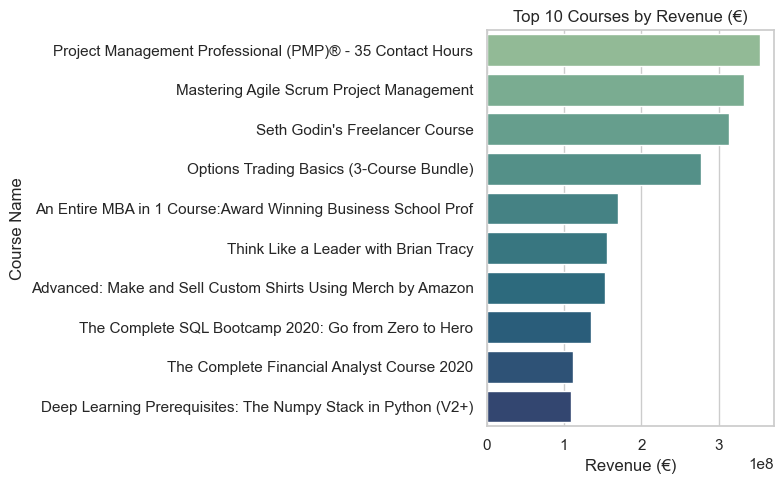

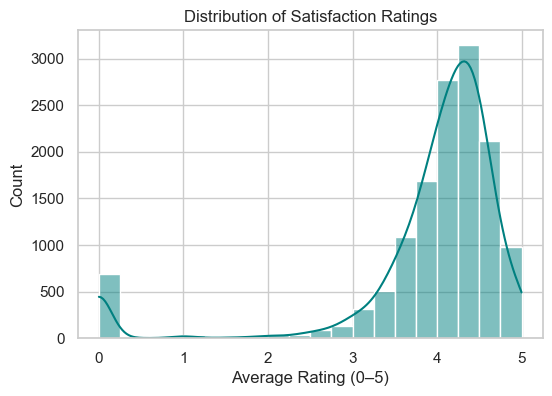

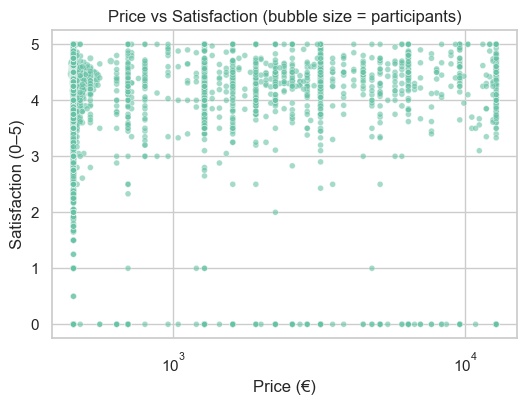

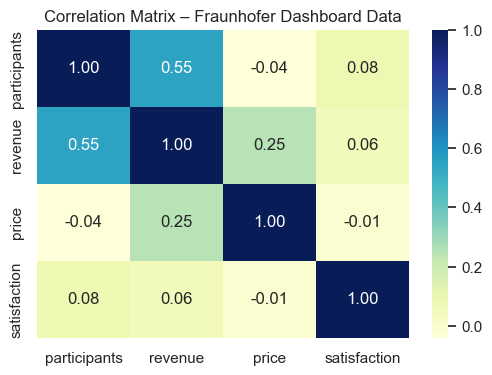

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load transformed dataset
df = pd.read_csv("fraunhofer_dashboard_data.csv")

# === Basic Info ===
print("📦 Dataset shape:", df.shape)
print("📋 Columns:", df.columns.tolist())

# === 1️⃣ Descriptive Statistics ===
desc = df[["participants", "num_reviews", "price", "revenue", "satisfaction"]].describe().round(2)
print("\n📊 Descriptive Summary:\n", desc)

# === 2️⃣ Top Courses by Revenue ===
top_revenue = df.sort_values("revenue", ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x="revenue", y="course_name", data=top_revenue, palette="crest")
plt.title("Top 10 Courses by Revenue (€)")
plt.xlabel("Revenue (€)")
plt.ylabel("Course Name")
plt.tight_layout()
plt.show()

# === 3️⃣ Average Satisfaction Distribution ===
plt.figure(figsize=(6,4))
sns.histplot(df["satisfaction"], bins=20, kde=True, color="teal")
plt.title("Distribution of Satisfaction Ratings")
plt.xlabel("Average Rating (0–5)")
plt.ylabel("Count")
plt.show()

# === 4️⃣ Relationship: Price vs Satisfaction ===
plt.figure(figsize=(6,4))
sns.scatterplot(x="price", y="satisfaction", size="participants", data=df, alpha=0.6, legend=False)
plt.title("Price vs Satisfaction (bubble size = participants)")
plt.xlabel("Price (€)")
plt.ylabel("Satisfaction (0–5)")
plt.xscale("log")
plt.show()

# === 5️⃣ Correlation Heatmap ===
plt.figure(figsize=(6,4))
sns.heatmap(df[["participants", "revenue", "price", "satisfaction"]].corr(),
            annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Matrix – Fraunhofer Dashboard Data")
plt.show()


📈 Correlation Matrix:
               participants  num_reviews  price  revenue  satisfaction
participants          1.00         0.78  -0.04     0.55          0.08
num_reviews           0.78         1.00  -0.01     0.46          0.07
price                -0.04        -0.01   1.00     0.25         -0.01
revenue               0.55         0.46   0.25     1.00          0.06
satisfaction          0.08         0.07  -0.01     0.06          1.00
🔹 Correlation (satisfaction ~ participants): r=0.082, p=8.533e-22
🔹 Correlation (satisfaction ~ price): r=-0.006, p=4.620e-01
🔹 Correlation (satisfaction ~ revenue): r=0.064, p=7.258e-14

📊 Quadrant Summary:
 satisfaction_level   Low  High
revenue_level                 
Low                 3712  3095
High                3102  3698


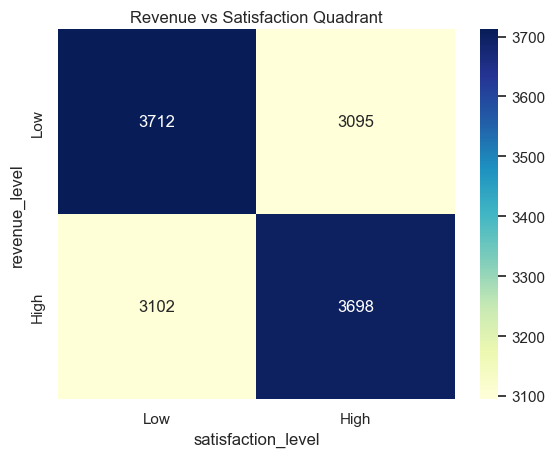

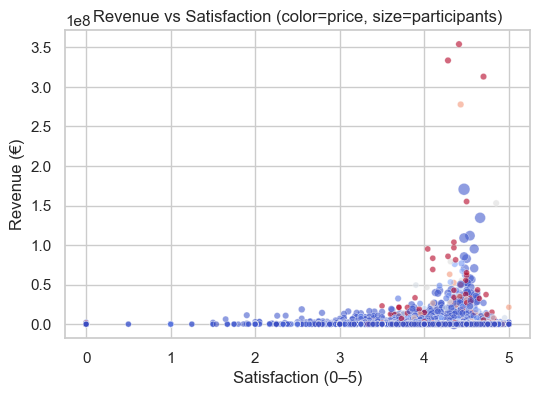

C:\Users\vuli\AppData\Local\Temp\ipykernel_30500\4018467019.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="segment", y="satisfaction", data=df, palette="crest")


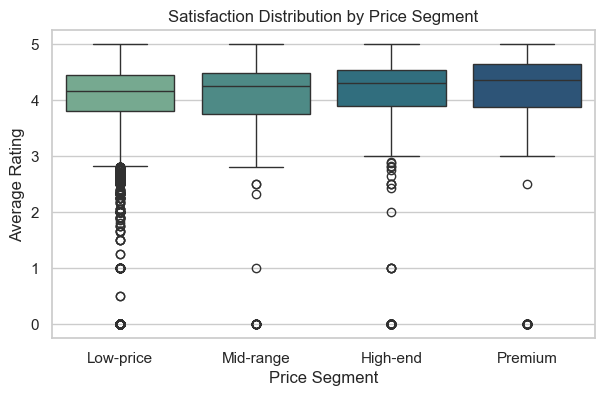


🚨 Potential Risk Courses (High Revenue, Low Satisfaction):
                                           course_name     revenue  \
158                        Learn about Content Writing  32427520.0   
304  Learn Cryptocurrency AltCoin Trading and ICO I...   3761940.0   
430                         Adsense Masterclass - 2020  18709600.0   
505  12 Lead Generation Strategies - Used By Sales ...   7602140.0   
582                 Introduction to Data Visualization   5679765.0   
657                       20 Ways To Make Money Online  15911805.0   
705   How to Plan and Outline Novels (Using Scrivener)   3408860.0   
707  How to work from home as a business consultant...   1658592.0   
749  Amazon Kindle eBook Publishing - How to Publis...   3861544.0   
778  The Internet of Things (IoT): 2020 Trends and ...  13909805.0   

     satisfaction  
158          3.69  
304          3.65  
430          2.55  
505          3.72  
582          3.60  
657          3.41  
705          3.43  
707      

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load dataset
df = pd.read_csv("fraunhofer_dashboard_data.csv")

# === 1️⃣ Kiểm tra tương quan chi tiết ===
corr_matrix = df[["participants", "num_reviews", "price", "revenue", "satisfaction"]].corr()
print("📈 Correlation Matrix:\n", corr_matrix.round(2))

# Pearson test cụ thể giữa satisfaction và các biến khác
for col in ["participants", "price", "revenue"]:
    r, p = pearsonr(df[col], df["satisfaction"])
    print(f"🔹 Correlation (satisfaction ~ {col}): r={r:.3f}, p={p:.3e}")

# === 2️⃣ Kiểm tra “High Revenue – High Satisfaction” Quadrant ===
# Tạo phân loại 4 nhóm theo median
df["revenue_level"] = pd.qcut(df["revenue"], q=2, labels=["Low", "High"])
df["satisfaction_level"] = pd.qcut(df["satisfaction"], q=2, labels=["Low", "High"])

pivot = pd.crosstab(df["revenue_level"], df["satisfaction_level"])
print("\n📊 Quadrant Summary:\n", pivot)

sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Revenue vs Satisfaction Quadrant")
plt.show()

# === 3️⃣ Explorative Scatter: Revenue vs Satisfaction ===
plt.figure(figsize=(6,4))
sns.scatterplot(x="satisfaction", y="revenue", size="participants",
                data=df, alpha=0.6, hue="price", palette="coolwarm", legend=False)
plt.title("Revenue vs Satisfaction (color=price, size=participants)")
plt.xlabel("Satisfaction (0–5)")
plt.ylabel("Revenue (€)")
plt.show()

# === 4️⃣ Course Segmentation by Price & Rating ===
# Tạo phân cụm đơn giản
df["segment"] = pd.cut(df["price"], bins=[0,500,1000,5000,20000],
                       labels=["Low-price", "Mid-range", "High-end", "Premium"])

plt.figure(figsize=(7,4))
sns.boxplot(x="segment", y="satisfaction", data=df, palette="crest")
plt.title("Satisfaction Distribution by Price Segment")
plt.xlabel("Price Segment")
plt.ylabel("Average Rating")
plt.show()

# === 5️⃣ Identify potential “outlier courses” ===
high_rev_low_sat = df[(df["revenue"] > df["revenue"].quantile(0.75)) &
                      (df["satisfaction"] < df["satisfaction"].quantile(0.25))]
print("\n🚨 Potential Risk Courses (High Revenue, Low Satisfaction):")
print(high_rev_low_sat[["course_name", "revenue", "satisfaction"]].head(10))
